https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

# 1. Apply() to Dataframe

In [19]:
import pandas as pd
df = pd.DataFrame({'A':[1,2], 'B':[10,20]})
print(df)

   A   B
0  1  10
1  2  20


In [2]:
print(pd.__version__)

2.2.0


In [3]:
def square(x):
    return x*x

In [4]:
df1 = df.apply(square)
print(df1)

   A    B
0  1  100
1  4  400


In [5]:
df2 = df.apply(lambda x: x*x)
print(df2)

   A    B
0  1  100
1  4  400


In [40]:
import pandas as pd
from numba import njit

# Your DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# Numba JIT decorator
@njit
def square(x):
    return x ** 2

# Apply the numba-jitted function to each element in the DataFrame using map
df1 = df.apply(lambda x: x.map(square))

# Print the result
print(df1)

   A   B   C
0  1  16  49
1  4  25  64
2  9  36  81


In [74]:
df.apply(lambda x:x, engine='numba')

,A,B
0,1,10
1,2,20


In [18]:
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


# 2. Apply() with lambda

In [77]:
df2 = df.apply(lambda x: x*x)
print(df2)

   A    B
0  1  100
1  4  400


In [41]:
import pandas as pd
import numpy as np
from numba import njit

# Your DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# Numba JIT decorator
@njit
def square(arr):
    return arr * arr

# Apply the numba-jitted function to each column in the DataFrame
for column in df.columns:
    df[column] = square(df[column].values)

# Print the result
print(df)

   A   B   C
0  1  16  49
1  4  25  64
2  9  36  81


# 3. Apply() along axis

In [6]:
import pandas as pd
import numpy as np

# สร้าง DataFrame ตัวอย่าง
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# ใช้ df.apply(np.sum, axis=0) เพื่อหาผลรวมของแต่ละคอลัมน์
result = df.apply(np.sum, axis=0)

# แสดงผลลัพธ์
result

A     6
B    15
C    24
dtype: int64

In [12]:
print(type(result),"index=",result.index)

<class 'pandas.core.series.Series'> index= Index(['A', 'B', 'C'], dtype='object')


In [13]:
import pandas as pd
import numpy as np

# สร้าง DataFrame ตัวอย่าง
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# ใช้ df.apply(np.sum, axis=1) เพื่อหาผลรวมของแต่ละแถว
result1 = df.apply(np.sum, axis=1)

# แสดงผลลัพธ์
result1

0    12
1    15
2    18
dtype: int64

In [14]:
print(type(result1),"index=",result.index)

<class 'pandas.core.series.Series'> index= Index(['A', 'B', 'C'], dtype='object')


In [24]:
import numpy as np
df3 = df.apply(np.sum, axis=0)
print(type(df3), " index = ",df3.index)
print(df3)

<class 'pandas.core.series.Series'>  index =  Index(['A', 'B'], dtype='object')
A     3
B    30
dtype: int64


In [26]:
df4 = df.apply(np.sum, axis=1)
print(type(df4), " index = ",df4.index)
print(df4)

<class 'pandas.core.series.Series'>  index =  RangeIndex(start=0, stop=2, step=1)
0    11
1    22
dtype: int64


# 4. Apply() with arguments

In [26]:
print(df)

   A   B   C
0  1  16  49
1  4  25  64
2  9  36  81


In [27]:
def sum(x, y, z):
    return x + y + z

In [28]:
df5 = df.apply(sum, args=(1,3))
print(df5)

    A   B   C
0   5  20  53
1   8  29  68
2  13  40  85


In [24]:
# Updated multiply function
def multiply(x, y, z):
    return x * y * z

# Apply the multiply function to each column of the DataFrame with additional arguments 1 and 2
df5 = df.apply(multiply, args=(1, 2))

# Print the result
df5

,A,B
0,2,20
1,4,40


# 5. Keyword agrs

In [29]:
df

,A,B,C
0,1,16,49
1,4,25,64
2,9,36,81


In [30]:
def sum2(x,y,z,m):
    return (x+y+z)*m

In [32]:
df6 = df.apply(sum2, args=(1,2), m=10)
print(df6)

     A    B    C
0   40  190  520
1   70  280  670
2  120  390  840


In [36]:
def test1(x,y,**dads):
    print(dads)

In [37]:
test1(5,6,m=1)

{'m': 1}


In [38]:
test1(5,6,m=1,n=2)

{'m': 1, 'n': 2}


In [39]:
test1(5,6,m=[1,2],n=2)

{'m': [1, 2], 'n': 2}


ตัวอย่างการใช้ numba:

In [ ]:
pip install numba

In [42]:
from numba import jit

# ตัวอย่างฟังก์ชันที่ใช้ numba
@jit(nopython=True)
def my_function(x, y):
    return x + y

# เรียกใช้ฟังก์ชัน
result = my_function(10, 20)
print(result)

30


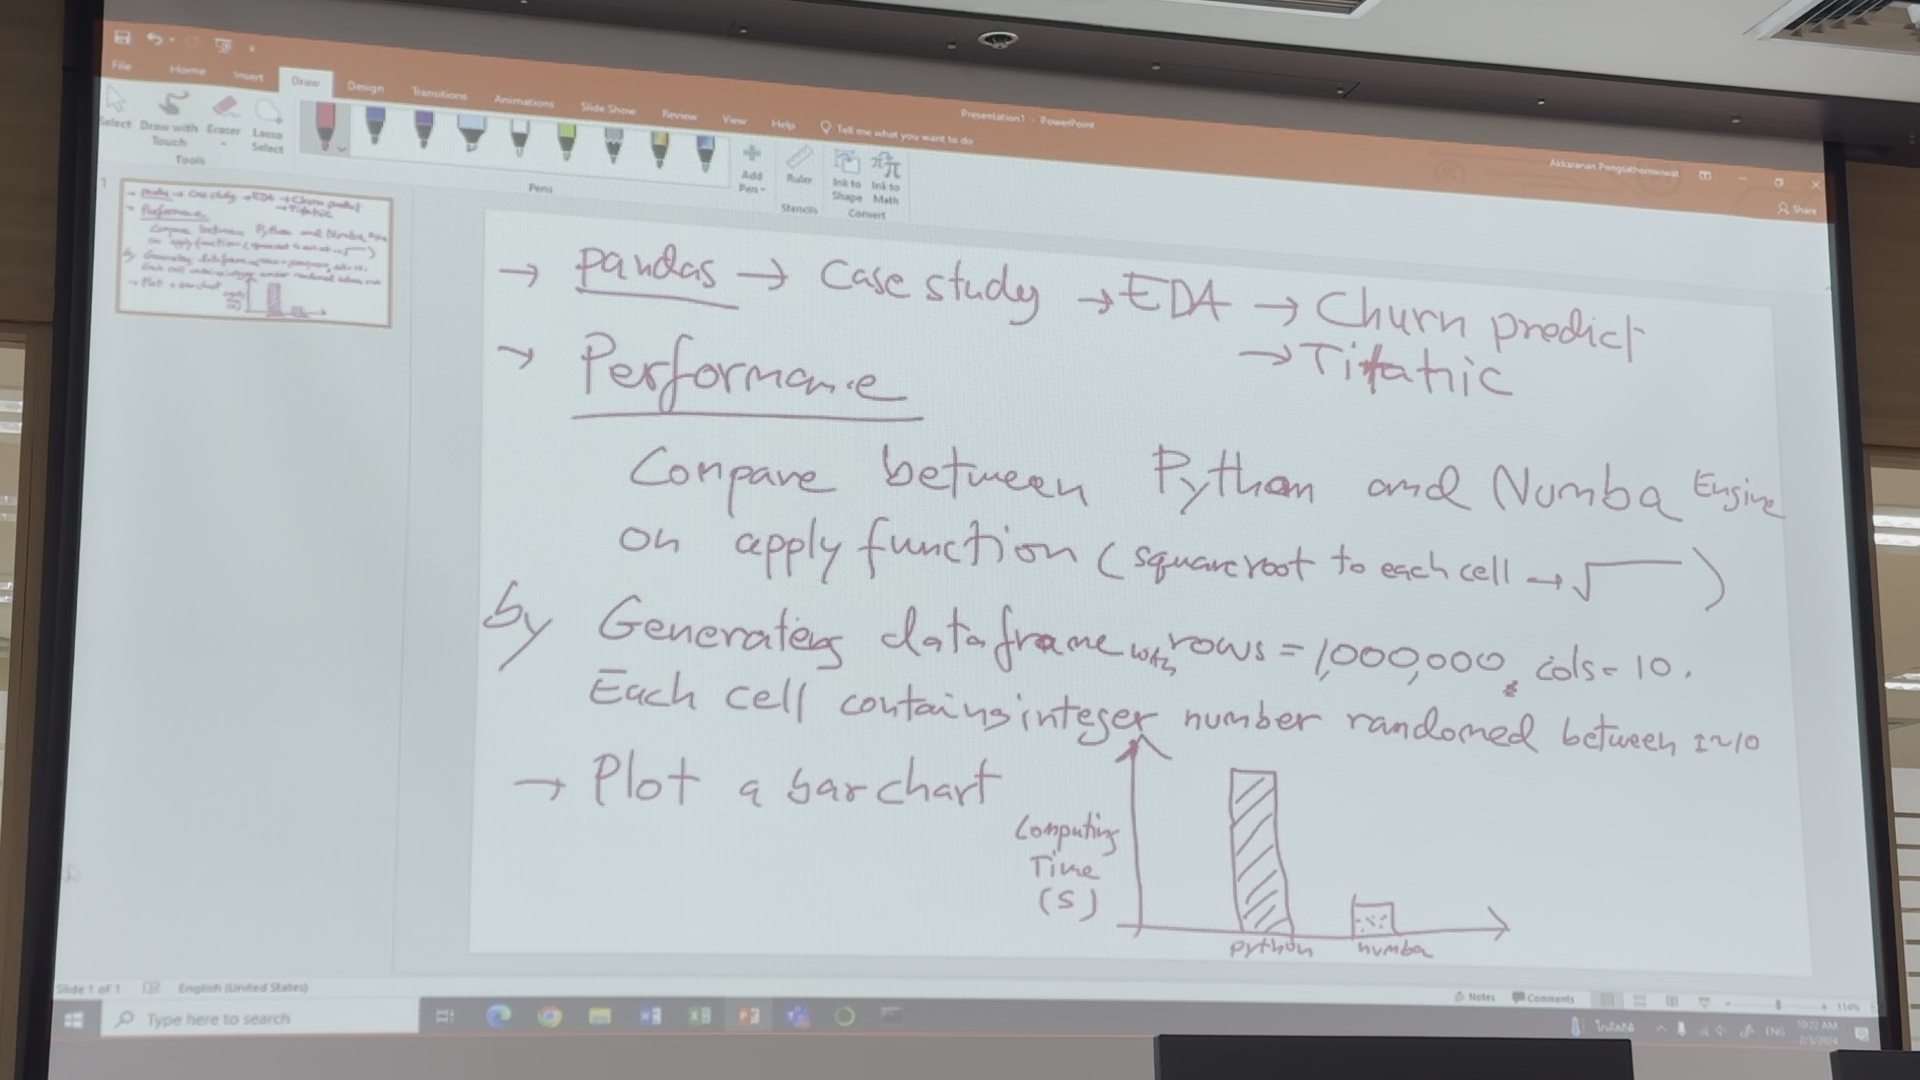